<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# **Hands-on lab: Exploratory Data Analysis - Laptops Pricing dataset**

Estimated time needed: **45** minutes

In this lab, you will use the skills acquired throughout the module, to explore the effect of different features on the price of laptops. 


# Objectives

After completing this lab you will be able to:

 - Visualize individual feature patterns
 - Run descriptive statistical analysis on the dataset
 - Use groups and pivot tables to find the effect of categorical variables on price
 - Use Pearson Correlation to measure the interdependence between variables


# Setup


For this lab, we will be using the following libraries:

* `skillsnetwork` for downloading the data
*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`scipy`](https://docs.scipy.org/doc/scipy/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for statistical operations.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


# Install Required Libraries

You can install the required libraries by simply running the `pip install` command with a `%` sign before it. For this environment, `seaborn` library requires installation.


In [ ]:
#import piplite
#await piplite.install('seaborn')
#await piplite.install('skillsnetwork')

### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#import skillsnetwork
#%matplotlib inline

# Import the dataset

You should download the modified version of the data set from the last module. 
Run the following code block to download the CSV file to this environment.


In [2]:
filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

Import the file to a pandas dataframe.


In [107]:
df = pd.read_csv(filepath, header=0)
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [115]:
df.drop(columns=df.columns[0:2], axis=1, inplace=True)
df.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [21]:
df.dtypes

Unnamed: 0.1          int64
Unnamed: 0            int64
Manufacturer         object
Category              int64
GPU                   int64
OS                    int64
CPU_core              int64
Screen_Size_inch    float64
CPU_frequency       float64
RAM_GB                int64
Storage_GB_SSD        int64
Weight_pounds       float64
Price                 int64
Price-binned         object
Screen-Full_HD        int64
Screen-IPS_panel      int64
dtype: object

# Task 1 - Visualize individual feature patterns

### Continuous valued features
Generate regression plots for each of the parameters "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price". Also, print the value of correlation of each feature with "Price".


(0.0, 3974.15)

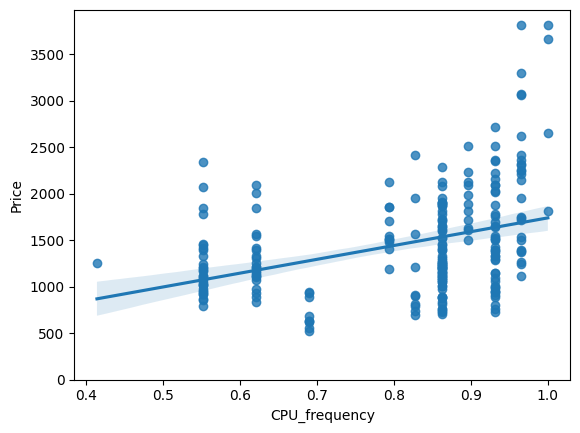

In [25]:
# Write your code below and press Shift+Enter to execute
# CPU_frequency plot
sns.regplot(data=df, x='CPU_frequency', y = 'Price')
plt.ylim(0)

#there seems to be little or no correlation

<details>
    <summary>Click here for Solution</summary>

```python
sns.regplot(x="CPU_frequency", y="Price", data=df)
plt.ylim(0,)
```

</details>


(0.0, 3974.15)

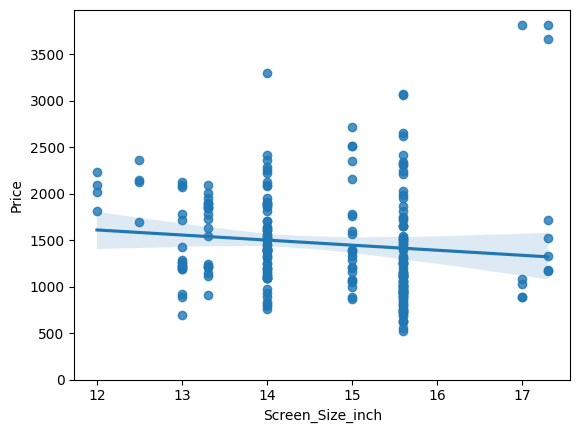

In [30]:
# Screen_Size_inch plot
sns.regplot(data=df, x='Screen_Size_inch', y='Price')
plt.ylim(0)

#there seems to be little or no correlation

<details>
    <summary>Click here for Solution</summary>

```python
sns.regplot(x="Screen_Size_inch", y="Price", data=df)
plt.ylim(0,)
```

</details>


(0.0, 3974.15)

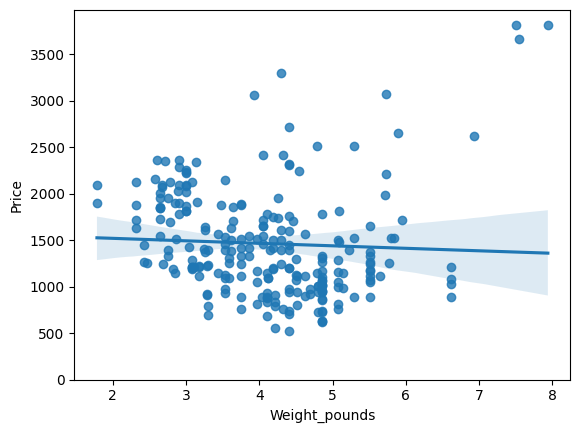

In [32]:
# Weight_pounds plot
sns.regplot(data=df, x='Weight_pounds', y='Price')
plt.ylim(0)

#there seems to be little or no correlation

<details>
    <summary>Click here for Solution</summary>

```python
sns.regplot(x="Weight_pounds", y="Price", data=df)
plt.ylim(0,)
```

</details>


In [39]:
# Correlation values of the three attributes with Price
for param in ["CPU_frequency", "Screen_Size_inch","Weight_pounds"]:
    print(df[[param,"Price"]].corr())

#as we have seen in the previous regression plots, there is not correlation among these three variables with respect to the Price

               CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
                  Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110644
Price                    -0.110644  1.000000
               Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000


<details>
    <summary>Click here for Solution</summary>

```python
for param in ["CPU_frequency", "Screen_Size_inch","Weight_pounds"]:
    print(f"Correlation of Price and {param} is ", df[[param,"Price"]].corr())
```

</details>


Interpretation: "CPU_frequency" has a 36% positive correlation with the price of the laptops. The other two parameters have weak correlation with price.


### Categorical features
Generate Box plots for the different feature that hold categorical values. These features would be "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"


<Axes: xlabel='Category', ylabel='Price'>

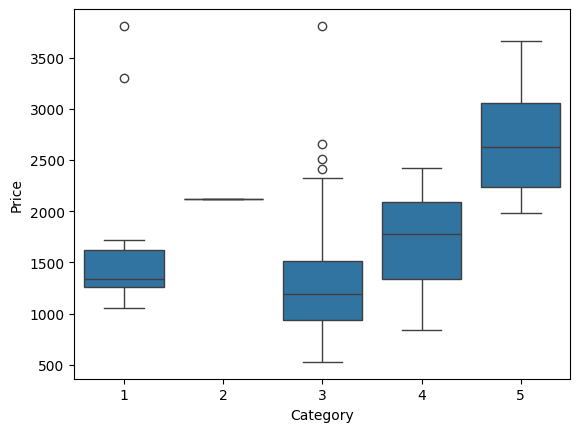

In [51]:
# Category plot
sns.boxplot(data=df, x="Category", y="Price")

#There is no a lot of difference of Price from the different categories (only for category 5), so the Category not seems to be a good predictor of price

In [54]:
#I try to calculate correlation
pearson_coef, p_value = stats.pearsonr(df['Category'], df['Price'])
print("Pearson Correlation Coefficient =", pearson_coef) 
print("P-value of P =", p_value) 

Pearson Correlation Coefficient = 0.5492972971857842
P-value of P = 3.681560628842986e-20


<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="Category", y="Price", data=df)
```

</details>


<Axes: xlabel='GPU', ylabel='Price'>

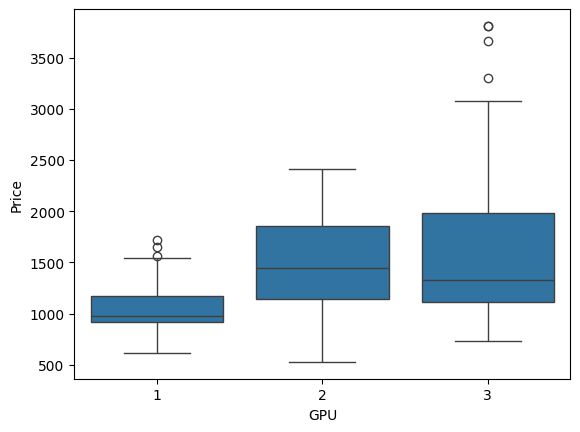

In [46]:
# GPU Box plot
sns.boxplot(data=df, x="GPU", y="Price")

#from the plot it doesn't seem to be correlation. If there is, it is probably low

In [50]:
#I try to calculate correlation
pearson_coef, p_value = stats.pearsonr(df['GPU'], df['Price'])
print("Pearson Correlation Coefficient =", pearson_coef) 
print("P-value of P =", p_value) 

Pearson Correlation Coefficient = 0.28829819888814273
P-value of P = 6.166949698364264e-06


<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="GPU", y="Price", data=df)
```

</details>


<Axes: xlabel='OS', ylabel='Price'>

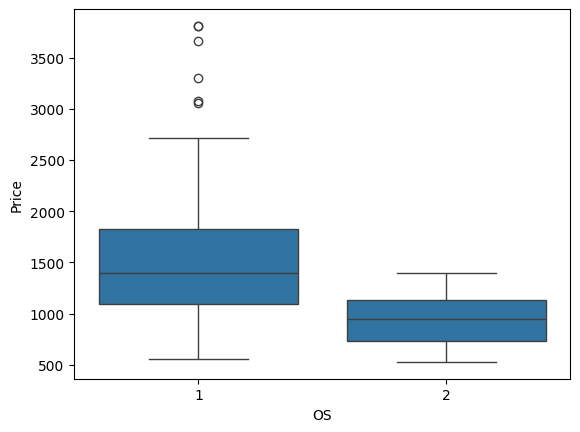

In [55]:
# OS Box plot
sns.boxplot(data=df, x='OS', y='Price')

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="OS", y="Price", data=df)
```

</details>


<Axes: xlabel='CPU_core', ylabel='Price'>

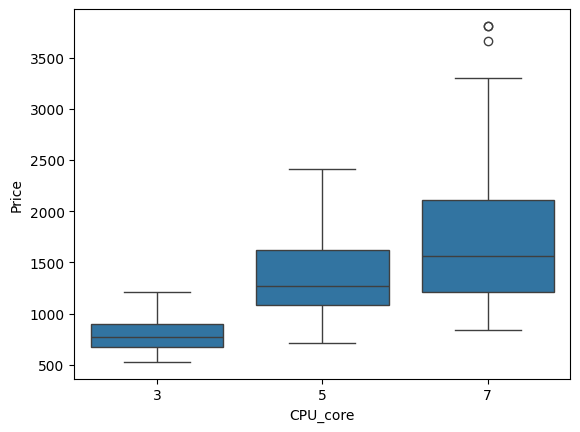

In [57]:
# CPU_core Box plot
sns.boxplot(data=df, x='CPU_core', y='Price')

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="CPU_core", y="Price", data=df)
```

</details>


<Axes: xlabel='RAM_GB', ylabel='Price'>

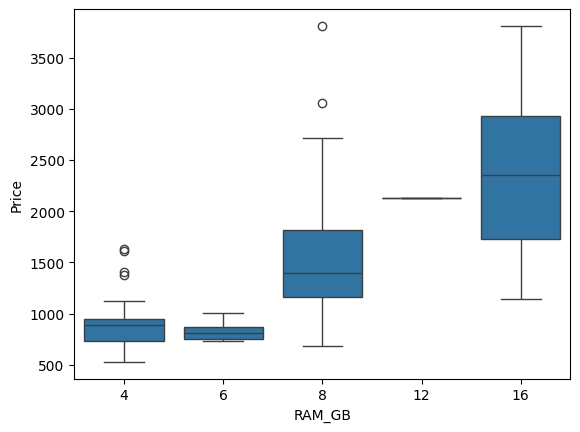

In [59]:
# RAM_GB Box plot
sns.boxplot(data=df, x='RAM_GB', y='Price')

In [83]:
#I try to calculate correlation
ram_list_all = df['RAM_GB'].unique()
ram_list = [4,8,16] 
df2 = df[df['RAM_GB'].isin(ram_list)]
pearson_coef, p_value = stats.pearsonr(df2['RAM_GB'], df2['Price'])
print("Pearson Correlation Coefficient =", pearson_coef) 
print("P-value of P =", p_value) 

Pearson Correlation Coefficient = 0.5369480133199045
P-value of P = 1.1862449103432032e-18


<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="RAM_GB", y="Price", data=df)
```

</details>


<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

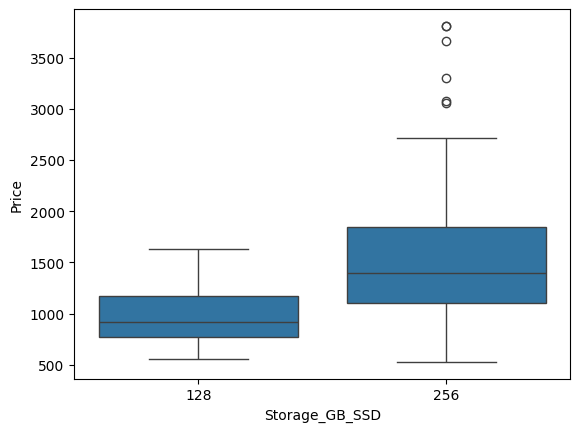

In [84]:
# Storage_GB_SSD Box plot
sns.boxplot(data=df, x='Storage_GB_SSD', y='Price')

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="Storage_GB_SSD", y="Price", data=df)
```

</details>


# Task 2 - Descriptive Statistical Analysis


Generate the statistical description of all the features being used in the data set. Include "object" data types as well.


In [90]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Screen-Full_HD,Screen-IPS_panel
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,118.500000,118.500000,3.205882,2.151261,1.058824,5.630252,14.688655,0.813822,7.882353,245.781513,4.106221,1462.344538,0.676471,0.323529
std,68.848868,68.848868,0.776533,0.638282,0.235790,1.241787,1.166045,0.141860,2.482603,34.765316,1.078442,574.607699,0.468809,0.468809
min,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000,0.000000,0.000000
25%,59.250000,59.250000,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000,0.000000,0.000000
50%,118.500000,118.500000,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000,1.000000,0.000000
75%,177.750000,177.750000,4.000000,3.000000,1.000000,7.000000,15.600000,0.931034,8.000000,256.000000,4.851000,1777.000000,1.000000,1.000000
max,237.000000,237.000000,5.000000,3.000000,2.000000,7.000000,17.300000,1.000000,16.000000,256.000000,7.938000,3810.000000,1.000000,1.000000


In [92]:
df.describe(include='object')

,Manufacturer,Price-binned
count,238,238
unique,11,3
top,Dell,Low
freq,71,160


,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


<details>
<summary>Click here for Solution</summary>

```python
print(df.describe())
print(df.describe(include=['object']))
```

</details>


# Task 3 - GroupBy and Pivot Tables

Group the parameters "GPU", "CPU_core" and "Price" to make a pivot table and visualize this connection using the pcolor plot.


In [132]:
# Write your code below and press Shift+Enter to execute
# Create the group
df_gpvars = df[['GPU','CPU_core','Price']]
grouped_df = df_gpvars.groupby(['GPU', 'CPU_core'], as_index=False).mean()
grouped_df

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


<details>
<summary>Click here for Solution</summary>

```python
df_gptest = df[['GPU','CPU_core','Price']]
grouped_test1 = df_gptest.groupby(['GPU','CPU_core'],as_index=False).mean()
print(grouped_test1)
```

</details>


In [135]:
# Create the Pivot table
grouped_pivot = grouped_df.pivot(index='GPU',columns='CPU_core')
grouped_pivot

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

<details>
<summary>Click here for Solution</summary>

```python
grouped_pivot = grouped_test1.pivot(index='GPU',columns='CPU_core')
print(grouped_pivot)
```

</details>


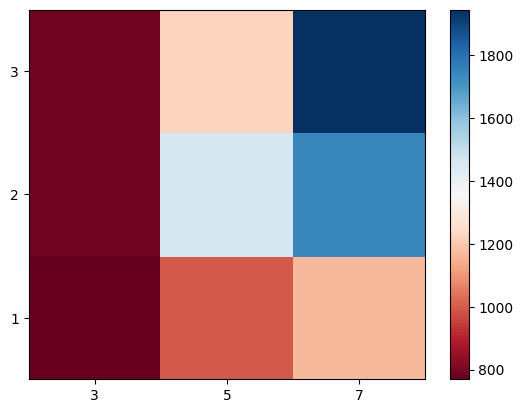

In [152]:
# Write your code below and press Shift+Enter to execute
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)
plt.show()

<details>
<summary>Click here for Solution</summary>

```python
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)
```

</details>


# Task 4 - Pearson Correlation and p-values

Use the `scipy.stats.pearsonr()` function to evaluate the Pearson Coefficient and the p-values for each parameter tested above. This will help you determine the parameters most likely to have a strong effect on the price of the laptops.


In [174]:

for column in df.select_dtypes(exclude='object').columns:
    if column != 'Price':
        pearson_coef, p_value = stats.pearsonr(df[column], df['Price'])
        print(column,'- Price')
        print("Pearson Correlation Coefficient:",pearson_coef)
        print("P-value:",p_value)
        print('---')

Category - Price
Pearson Correlation Coefficient: 0.28624275581264147
P-value: 7.225696235806464e-06
---
GPU - Price
Pearson Correlation Coefficient: 0.28829819888814273
P-value: 6.166949698364264e-06
---
OS - Price
Pearson Correlation Coefficient: -0.22172980114827398
P-value: 0.0005696642559246697
---
CPU_core - Price
Pearson Correlation Coefficient: 0.45939777733551157
P-value: 7.912950127009089e-14
---
Screen_Size_inch - Price
Pearson Correlation Coefficient: -0.11064420817118269
P-value: 0.08853397846830766
---
CPU_frequency - Price
Pearson Correlation Coefficient: 0.36666555892588604
P-value: 5.5024633507134316e-09
---
RAM_GB - Price
Pearson Correlation Coefficient: 0.5492972971857842
P-value: 3.681560628842986e-20
---
Storage_GB_SSD - Price
Pearson Correlation Coefficient: 0.24342075521810294
P-value: 0.00014898923191724212
---
Weight_pounds - Price
Pearson Correlation Coefficient: -0.05031225837751551
P-value: 0.43976938534338944
---
Screen-Full_HD - Price
Pearson Correlation C

<details>
<summary>Click here for Solution</summary>

```python
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(param)
    print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value)
```

</details>


# Congratulations! You have completed the lab


## Authors


[Abhishek Gagneja](https://www.coursera.org/instructor/~129186572)

[Vicky Kuo](https://author.skills.network/instructors/vicky_kuo)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-15|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-18|0.2|Vicky Kuo|Reviewed and Revised|


Copyright © 2023 IBM Corporation. All rights reserved.
